Hoemwork3
===
***
- 작성자 : B889047 윤준호
- 작성일 : 2022 / 10 / 28 ,금
***

## Problem # 1: (Programming) Recursion
Use recursion to implement the following functions according to their specification. You do not need to enforce the preconditions.

```python

def filter(nlist):
    """Returns: A copy of nlist with all negative numbers removed, preserving order Example: filter([1, -1, 2, -3, -4, 0]) is [1, 2, 0]
    Precondition: nlist is a (possibly empty) list of numbers"""
    
def segregate(nlist):
    """Returns: A tuple segregating nlist into negative and non-negative.
    This function returns a tuple (pos,rlist). The value rlist is a reordered copy of nlist where negatives come before the non-negatives. However, ordering inside each part (negative, non-negatives) should remain EXACTLY as it is in nlist.
    The value pos indicates the first position of a non-negative number in rlist. If there are no non-negative numbers, pos is -1.
    Examples: segregate([1, -1, 2, -5, -3, 0]) returns (3, [-1, -5, -3, 1, 2, 0]) seregate([-1, -5, -3]) returns (-1, [-1, -5, -3])
    Precondition: nlist is a (possibly empty) list of numbers"""
```



In [1]:
def normal_filter(nlist):
    return list(filter(lambda x: x >= 0, nlist))

def recursive_filter1(nlist):
    if not list(filter(lambda x: x < 0,nlist)):
        return nlist
    for i,v in enumerate(nlist):
        if v < 0:
            del nlist[i]
            break
    return recursive_filter1(nlist)

def recusive_filter2(nlist):
    if len(nlist) == 1:
        return [] if nlist[0] < 0 else nlist
    mid = len(nlist) // 2
    return recusive_filter2(nlist[:mid]) + recusive_filter2(nlist[mid:])

In [2]:
recursive_filter1([1, -1, 2, -3, -4, 0])

[1, 2, 0]

In [3]:
recusive_filter2([1, -1, 2, -3, -4, 0])

[1, 2, 0]

In [4]:
normal_filter([1, -1, 2, -3, -4, 0])

[1, 2, 0]

## Problem #2: (Programming) Recursion
In lecture, we introduced the class Person, whose specification is below. You create a person with the constructor Person(name,mom,dad). To make the person s in the picture to the right, you use the assignment s = Person('Jane',None,None). To make the person q, you use the assignment q = Person('Robin', s, None). Finally, to make the person p, you use the assignment p = Person('Jack',q,r).

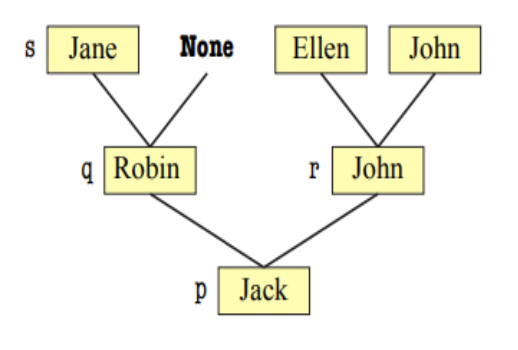

```python
class Person(object):
    """Instance is a person/family tree INSTANCE ATTRIBUTES: name: First name [nonempty str]
    mom: Mom’s side [Person or None] dad: Dad’s side [Person or None] """ ...
```

Use recursion to implement the functions specified below; do not use loops. You do not need to enforce preconditions.

### 2-1

```python
def ancestors(p):
    """Returns: The list of names of all ancestors of p
    The name of p should not be in the list (unless another ancestor has this name). Duplicates names (e.g. different ancestors with the same name) are okay. However, the list returned should be sorted alphabetically.
    Example: ancestors(p) is ['Ellen','Jane','John','John','Robin'], if p is the person shown above.
    Precondition: p is a Person and not None"""
```

In [5]:
class Person:
    def __init__(self,name,mom=None,dad=None):
        self.name = name
        self.mom = mom
        self.dad = dad
    def __str__(self):
        return self.name
    
s = Person('Jane')
q = Person('Robin',mom=s)
e = Person('Ellen')
j1 = Person('John')
j2 = Person('John',e,j1)
p = Person('Jack',q,j2)

In [6]:
def ancestors(p):
    p_parent = list()
    if p.mom:
        p_parent.append(str(p.mom))
        res = ancestors(p.mom)
        p_parent.extend(res)
    if p.dad:
        p_parent.append(str(p.dad))
        res = ancestors(p.dad)
        p_parent.extend(res)
    return sorted(p_parent)

In [7]:
print(ancestors(p))

['Ellen', 'Jane', 'John', 'John', 'Robin']


### 2-2

As we have seen, making a Person is a complicated affair. You have to create each ancestor object individually. One way to create Person objects quickly is to use a geneaology list. A geneaology list is defined recursively as follows:

- It is a nonempty list with exactly three elements.
- The first element is a nonempty string, respresenting the person’s name. 
- The last two elements are either None or genealogy lists.

Looking at the Person objects on the previous page, s is `['Jane',None,None]` while q is `['Robin',['Jane',None,None],None]`. We can even represent p as the list
`['Jack',['Robin',['Jane',None,None],None], ['John',['Ellen',None,None],['John',None,None]]]`
Use this recursive definition to implement the function below.

```python
def list2person(glist):
    """Return: A person object equivalent to the given genealogy list. Example: list2person(['Fred', None, None]) is Person('Fred',None,None) See the description above for more examples.
    Precondition: glist is a genealogy list."""
```

In [8]:
def list2person(glist):
    person_list = []
    me = glist[0]
    mom,dad = glist[1:]
    mom_name =  mom[0] if type(mom) is list else mom
    dad_name = dad[0] if type(dad) is list else dad
    person_list.append(Person(me,mom_name,dad_name))
    
    if mom and type(mom) is list:
        person_list.extend(list2person(mom))
    if dad and type(dad) is list:
        person_list.extend(list2person(dad))
    return person_list
        

In [9]:
print(*list2person(['Jack',['Robin',['Jane',None,None],None], ['John',['Ellen',None,None],['John',None,None]]]))


Jack Robin Jane John Ellen John


## Problem #3:

### 3-1. What does the Call Stack look like? 

The Dutch version of “Happy Birthday” says “Long shall he/she live in glory”. The first half
of the sentence is repeated 3 times, then the second half of the song is repeated 3 times.
Below on the left is the (error-free) code which prints out this Dutch song. On the right, draw
the full call stack as it would look when line 5 has just been executed for the second time.
Include crossed-out frames. 

In [10]:
def he():
    print("hij")
    
def she() :
    print("ze")

def live_long (is_female):
    print ("Lang zal")
    if is_female:
        she() 
    else:
        he()
    print("leven")
    
def in_glory():
    print("In de gloria")

def song(is_female):
    """Happy Birthday in Dutch""" 
    for verse in list (range (3)):
        live_long(is_female)
    for verse in list(range(3)):
        in_glory()

song(True)

Lang zal
ze
leven
Lang zal
ze
leven
Lang zal
ze
leven
In de gloria
In de gloria
In de gloria


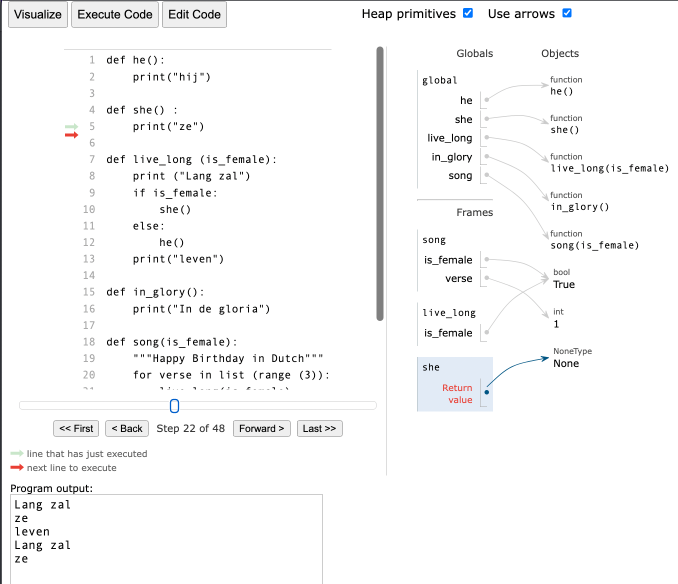

### 3-2. What went wrong?
Below on the left is code with one or more errors. Below on the right is the error message that is printed when the code is run. Fix the one line of code that led to the error message in the traceback. (Fix only the error reported in this traceback.)

A : 만약 Traceback에서 나온 오류들중 하나를 고쳐야 된다면, line_with_name("Teo") 를 삭제하는것이 맞다. 그 이유는 설령, happy_birthday()함수가 없어 happy_holiday()로 변경하여도, holiday라는 이름의 매개변수는 찾을 수 없다. 그렇기에, Traceback에 있으면서, 한줄을 고쳐야 한다면 해당 줄을 없애야한다

In [11]:
def happy_holiday(holiday):
    print(f"Happy {holiday}")

def dear():
    print(f"Dear {name}")

def to_you():
    print("to you")

def line_with_name(name):
    happy_birthday(holiday)
    dear(name)

def basic_line(holiday):
    happy_holiday(holiday)
    to_you()

def song():
    basic_line("Birthday")
    basic_line("Birthday")
#     line_with_name("Teo")
    basic_line(200)

song()

Happy Birthday
to you
Happy Birthday
to you
Happy 200
to you


## Problem #4:Suppose you are given the following function definitions.

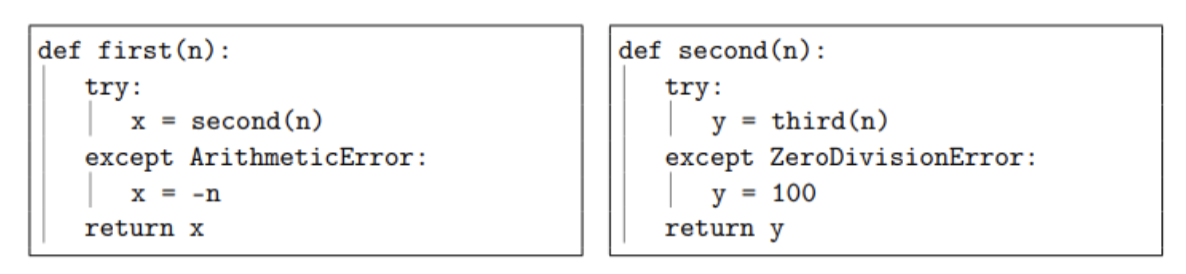

Complete the function third so that the following are all true. 
- first(0) returns 100
- first(n) crashes whenever n < 0
- first(n) returns -n whenever n is odd
- first(n) returns n//2 whenever n is even.

Moreover, third is not allowed to have any return statement other than the one provided. You have to produce the functionality above by raising exceptions. You should use the exceptions Exception, ArithmeticError, and ZeroDivisionError. ArithmeticError is a subclass of Exception and ZeroDivisionError is a subclass of ArithmeticError.

In [12]:
'''
if n is 0 -> raise ZeroDivision
if n < 0 raise Exception
if n 홀수 -> returns -n -> raise Arithmetic
if n 짝수 -> returns n // 2 -> return n // 2
'''

def third(n):
    if n < 0:
        raise Exception()
    if n == 0:
        raise ZeroDivisionError()
    elif n % 2:
        raise ArithmeticError()
    elif not n%2:
        return n // 2
    

In [13]:
def first(n):
    try:
        x = second(n)
    except ArithmeticError:
        print("arithmetic exception")
        x = -n
    return x

def second(n):
    try:
        y = third(n)
    except ZeroDivisionError:
        print("zerodivision exception")
        y = 100
    return y

In [14]:
first(0)

zerodivision exception


100

In [15]:
first(-2)

Exception: 

In [16]:
first(3)

arithmetic exception


-3

In [17]:
first(4)

2

## Problem #5:

### Suppose you are given the following function definitions

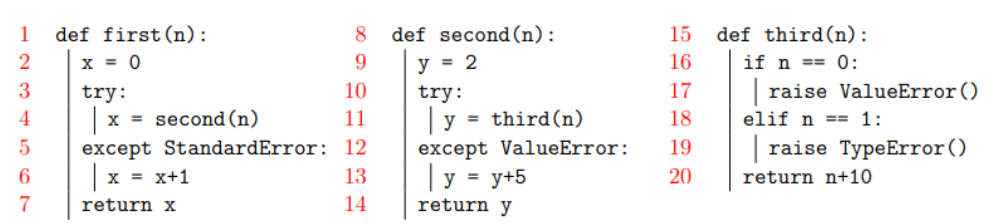
Assume that ValueError and TypeError are subclasses of StandardError, but neither is a subclass of the other. For each function call below, give the answer returned. 

If there is no value (e.g. program crashes), tell us that.
You must (1) identify what caused the error, if there was one, and (2) identify the line number where it recovered from the error, if it recovers at all.

In [18]:
import sys

In [19]:
class StandardError(Exception):
    def __init__(self,msg):
        super().__init__(msg)
        
class ValueError(StandardError):
    def __init__(self,msg):
        print(msg)
        super().__init__(msg)

class TypeError(StandardError):
    def __init__(self,msg):
        print(msg)
        super().__init__(msg)

In [20]:
def first(n):
    x = 0
    try:
        x = second(n)
    except StandardError:
        print(f"Error recovered in line {sys._getframe().f_lineno + 1}")
        x = x + 1
    return x
    
def second(n):
    y = 2
    try:
        y = third(n)
    except ValueError as e:
        print(f"Error recovered in line {sys._getframe().f_lineno + 1}")
        y = y + 5
    return y

def third(n):
    if n == 0:
        raise ValueError(f"Value Error : {n}")
    elif n == 1:
        raise TypeError(f"TypeError : {n}")
    return n + 10

In [21]:
first(0)

Value Error : 0
Error recovered in line 16


7

In [22]:
first(1)

TypeError : 1
Error recovered in line 7


1

In [23]:
first(2)

12